
Train - Summary Statistics:
       utterance_count  sentence_count_per_utterance    word_count
count     12457.000000                  12457.000000  12457.000000
mean          9.488240                      0.765913     90.659469
std           4.150939                      0.579955     48.952439
min           2.000000                      0.000000     20.000000
25%           7.000000                      0.400000     58.000000
50%           9.000000                      0.666667     80.000000
75%          12.000000                      1.000000    113.000000
max          61.000000                     15.000000    606.000000

Dev - Summary Statistics:
       utterance_count  sentence_count_per_utterance  word_count
count       499.000000                    499.000000  499.000000
mean          9.372745                      0.799926   89.721443
std           4.002677                      0.573322   46.651495
min           2.000000                      0.000000   25.000000
25%           6.

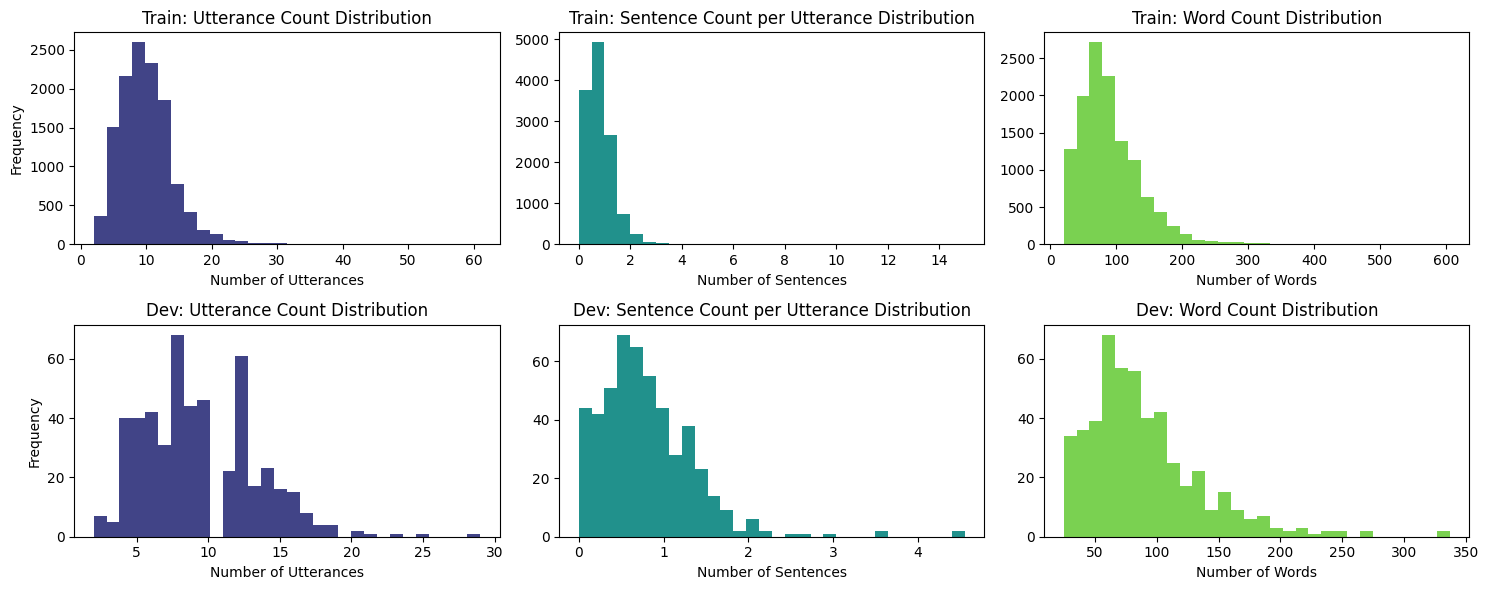

In [3]:
import os
import re
import platform
import pandas as pd
import matplotlib.pyplot as plt

def extract_dialogue_metrics(file_path):
    df = pd.read_csv(file_path)
    
    if 'dialogue' not in df.columns:
        raise ValueError("'dialogue' 열이 CSV 파일에 없습니다.")
    
    # 발화 수 계산 함수
    def count_utterances(dialogue):
        return len(re.findall(r'#Person\d+#', dialogue))
    
    # 발화당 문장 수 계산 함수
    def count_sentences_per_utterance(dialogue):
        utterances = re.split(r'#Person\d+#', dialogue)[1:]  # 첫 번째 요소는 빈 문자열
        return [len(utterance.split('. ')) - 1 for utterance in utterances]
    
    # 대화당 단어 수 계산 함수
    def count_words(dialogue):
        return len(dialogue.split())
    
    df['utterance_count'] = df['dialogue'].apply(count_utterances)
    df['sentence_count_per_utterance'] = df['dialogue'].apply(lambda x: sum(count_sentences_per_utterance(x)) / count_utterances(x))
    df['word_count'] = df['dialogue'].apply(count_words)
    
    return df

def print_summary_statistics(df, label):
    # 각 메트릭의 통계량 계산
    stats = df[['utterance_count', 'sentence_count_per_utterance', 'word_count']].describe()
    
    print(f"\n{label} - Summary Statistics:")
    print(stats)

def plot_dialogue_metrics(train_df, dev_df):
    fig, axes = plt.subplots(2, 3, figsize=(15, 6))
    
    # Train 데이터 히스토그램
    axes[0, 0].hist(train_df['utterance_count'], bins=30, color=plt.cm.viridis(0.2))
    axes[0, 0].set_title('Train: Utterance Count Distribution')
    axes[0, 0].set_xlabel('Number of Utterances')
    axes[0, 0].set_ylabel('Frequency')

    axes[0, 1].hist(train_df['sentence_count_per_utterance'], bins=30, color=plt.cm.viridis(0.5))
    axes[0, 1].set_title('Train: Sentence Count per Utterance Distribution')
    axes[0, 1].set_xlabel('Number of Sentences')

    axes[0, 2].hist(train_df['word_count'], bins=30, color=plt.cm.viridis(0.8))
    axes[0, 2].set_title('Train: Word Count Distribution')
    axes[0, 2].set_xlabel('Number of Words')

    # Dev 데이터 히스토그램
    axes[1, 0].hist(dev_df['utterance_count'], bins=30, color=plt.cm.viridis(0.2))
    axes[1, 0].set_title('Dev: Utterance Count Distribution')
    axes[1, 0].set_xlabel('Number of Utterances')
    axes[1, 0].set_ylabel('Frequency')

    axes[1, 1].hist(dev_df['sentence_count_per_utterance'], bins=30, color=plt.cm.viridis(0.5))
    axes[1, 1].set_title('Dev: Sentence Count per Utterance Distribution')
    axes[1, 1].set_xlabel('Number of Sentences')

    axes[1, 2].hist(dev_df['word_count'], bins=30, color=plt.cm.viridis(0.8))
    axes[1, 2].set_title('Dev: Word Count Distribution')
    axes[1, 2].set_xlabel('Number of Words')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    os_name = platform.system()
    if os_name == 'Windows':
        PRE_PATH = ''
    elif os_name == 'Linux':
        PRE_PATH = '/kkh/'
    elif os_name == 'Darwin': # 맥
        PRE_PATH = '/kkh/'

    DATA_PATH = PRE_PATH + "data/"
    train_file_path = DATA_PATH + 'train.csv'
    dev_file_path = DATA_PATH + 'dev.csv'
    
    # Train 데이터 메트릭 추출 및 통계량 출력
    train_df = extract_dialogue_metrics(train_file_path)
    print_summary_statistics(train_df, "Train")
    
    # Dev 데이터 메트릭 추출 및 통계량 출력
    dev_df = extract_dialogue_metrics(dev_file_path)
    print_summary_statistics(dev_df, "Dev")
    
    # 메트릭 시각화
    plot_dialogue_metrics(train_df, dev_df)
